Exercise 3 
If you did the exercises in Chapter 3, you saw the effect of the Hamming window, and some of the other windows provided by NumPy, on spectral leakage. We can get some insight into the effect of these windows by looking at their DFTs.
In addition to the Gaussian window we used in this chapter, create a Hamming window with the same size. Zero-pad the windows and plot their DFTs. Which window acts as a better low-pass filter? You might find it useful to plot the DFTs on a log-y scale.
Experiment with a few different windows and a few different sizes.

如果您在第3章中進行了練習，您將看到Hamming窗口以及NumPy提供的其他一些窗口對頻譜洩漏的影響。通過查看它們的DFT，我們可以了解這些窗口的效果。
除了本章中使用的高斯窗口外，還要創建一個具有相同大小的漢明窗口。對窗口進行零填充並繪製其DFT。哪個窗口可以作為更好的低通濾波器？您可能會發現以對數標度繪製DFT很有用。
試用幾個不同的窗口和幾個不同的大小。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

建一個以44.1 kHz採樣的1秒波。

In [2]:
from thinkdsp import SquareSignal

signal = SquareSignal(freq=440)
wave = signal.make_wave(duration=1.0, framerate=44100)

我將創建一些窗口。我選擇了高斯窗口的標準偏差，使其與其他窗口相似。

In [4]:
import scipy.signal
M = 15
std = 2.5

gaussian = scipy.signal.gaussian(M=M, std=std)   
bartlett = np.bartlett(M)
blackman = np.blackman(M)
hamming = np.hamming(M)
hanning = np.hanning(M)

windows = [blackman, gaussian, hanning, hamming]
names = ['blackman', 'gaussian', 'hanning', 'hamming']

for window in windows:
    window /= sum(window)

windows看起來如何。

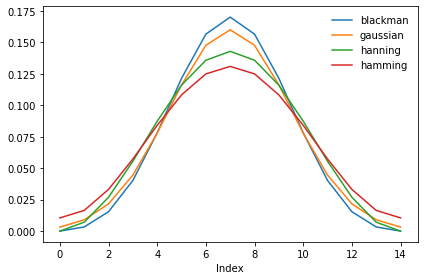

In [5]:
for window, name in zip(windows, names):
    plt.plot(window, label=name)

decorate(xlabel='Index')

感覺很相近。接下來看看DFT。

In [6]:
def zero_pad(array, n):
    
    res = np.zeros(n)
    res[:len(array)] = array
    return res

In [7]:
def plot_window_dfts(windows, names):
    """
    """
    for window, name in zip(windows, names):
        padded =  zero_pad(window, len(wave))
        dft_window = np.fft.rfft(padded)
        plt.plot(abs(dft_window), label=name)

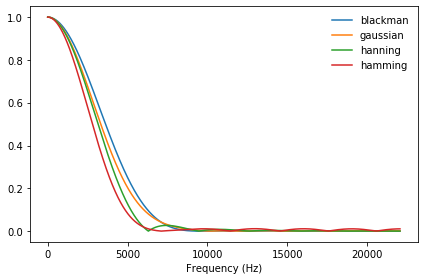

In [8]:
plot_window_dfts(windows, names)
decorate(xlabel='Frequency (Hz)')

也很相似，但是hamming掉落最快，blackman放慢，hanning的sidelobe最明顯。

將y軸取log後結果。

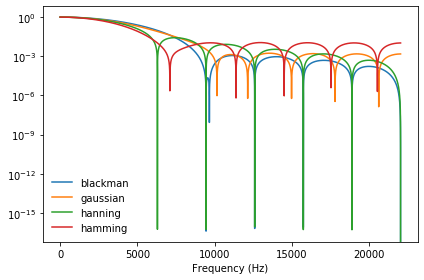

In [9]:
plot_window_dfts(windows, names)
decorate(xlabel='Frequency (Hz)', yscale='log')

在對數尺度上，我們可以看到hamming和hanning的下降速度比其他兩個起初更快。而且hamming windows和Gaussian windows似乎具有最持久的sidelobe。hanning windows可能具有快速下降和最小sidelobe的最佳組合。